# Temperature
Reference: [The Climate Issue](https://www.economist.com/weeklyedition/2019-09-21)

## Data processing

In [1]:
import pandas as pd

# Read the file
df = pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop keep date and temperature, and rename
df = df[['dt', 'LandAverageTemperature']].rename(columns={'dt': 'Date', 'LandAverageTemperature': 'Temp'})
df.head()

,Date,Temp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [3]:
# Check datatype of the two columns
print(df.Date.dtype)
print(df.Temp.dtype)

object
float64


In [4]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Temp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [5]:
# Group df by year, and compute average temperature of each year
df = df.groupby(df.Date.dt.year).mean().reset_index()

# Select data starting from 1835
df = df[df['Date'] >= 1835].reset_index(drop=True)
df.head()

,Date,Temp
0,1835,7.392500
1,1836,7.695833
2,1837,7.375667
3,1838,7.514917
4,1839,7.632250


## Data visualization

In [6]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

%matplotlib inline

In [7]:
# Get RdBu_r cmap
color = get_cmap('RdBu_r')

# Create a Normalize instance
# Adjust vmin and vmax by 0.1, to show more darker colors
norm = Normalize(df['Temp'].min()+.1, df['Temp'].max()-.1, clip=True)

Text(0.02, 0.02, 'Created by H | Data: Kaggle')

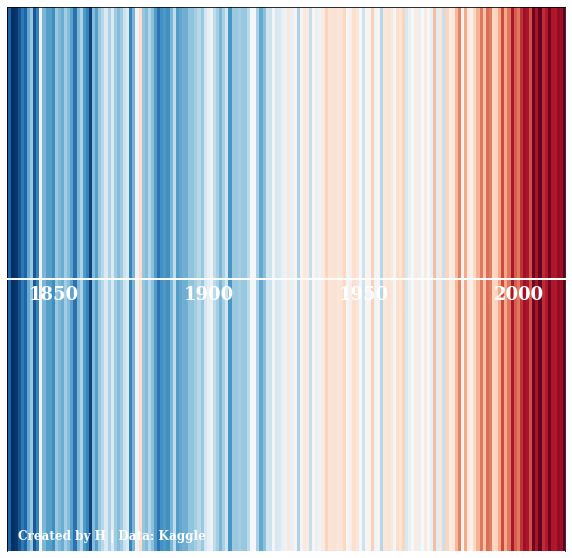

In [8]:
# Set font to serif
plt.rcParams['font.family'] = 'serif'

# Set fontweight to bold
plt.rcParams['font.weight'] = 'bold'

# Create a fig
fig = plt.figure(figsize=(10, 10))

# Assign axis to ax
ax = fig.gca()

# Loop through all rows in df
for d, t in zip(df.Date, df.Temp):
    
    # Plot vertical line
    # Get color from cmap with normalized temperature
    plt.axvline(d, color=color(norm(t)), linewidth=5, zorder=-1)

# Turn top, left and right borders
ax.spines['top'].set(visible=True)
ax.spines['left'].set(visible=True)
ax.spines['right'].set(visible=True)

# Turn of bottom border
ax.spines['bottom'].set(visible=True, position='center', color='w', linewidth=2)

# Remove xticks, set label color, and lablel font size
ax.tick_params(axis='x', bottom=False, labelcolor='w', labelsize=18)

# Remove yticks and ticklabels
ax.tick_params(axis='y', left=False, labelleft=False)

# Set xticklabels
ax.set_xticks([i for i in range(1850, 2001, 50)])

# Set limit of x axis
ax.set_xlim(df.Date.min(), df.Date.max())

# Reference data source
ax.text(.02, .02, 'Created by H | Data: Kaggle', 
        transform=ax.transAxes, color='w', horizontalalignment='left', fontsize=12)

In [9]:
# Save fig
fig.savefig('temperature', dpi=300, bbox_inches='tight')